In [3]:
#!pip install pycaret
#PyCaret was installed in the Vrtual env so no need to install it here again

We will use ‘diabetes’ dataset and the goal is to predict patient outcome (binary 1 or 0) based on several factors such as Blood Pressure, Insulin Level, Age etc. The dataset is available on PyCaret’s github repository. 

## Getting the Data

In [1]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


PyCaret can work directly with pandas dataframe.

In [5]:
import pandas as pd
df = pd.read_csv("Connections.csv", skiprows=2)

## Setting up Environment

The first step of any machine learning experiment in PyCaret is setting up the environment by importing the required module and initializing setup( ). 

The module used in this example is pycaret.classification.
Once the module is imported, setup() is initialized by defining the dataframe (‘diabetes’) and the target variable (‘Class variable’).

All the preprocessing steps are applied within setup().

Data Preprocessing steps that are compulsory for machine learning such as missing values imputation, categorical variable encoding, label encoding (converting yes or no into 1 or 0), and train-test-split are automatically performed when setup() is initialized.

In [8]:
from pycaret.classification import *
exp1 = setup(diabetes, target = 'Class variable')

,Description,Value
0,session_id,249
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


## Compare Models

This is the first step recommended in supervised machine learning experiments (classification or regression). This function trains all the models in the model library and compares the common evaluation metrics using k-fold cross validation (by default 10 folds). The evaluation metrics used are:

For Classification: Accuracy, AUC, Recall, Precision, F1, Kappa

For Regression: MAE, MSE, RMSE, R2, RMSLE, MAPE

💡 Metrics are evaluated using 10-fold cross validation by default. It can be changed by changing the value of fold parameter.

💡 Table is sorted by ‘Accuracy’ (Highest to Lowest) value by default. It can be changed by changing the value of sort parameter.

In [9]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7802,0.8533,0.6357,0.7135,0.6695,0.5063,0.5105,0.0360
rf,Random Forest Classifier,0.7712,0.8161,0.6044,0.7000,0.6456,0.4792,0.4840,0.2190
lightgbm,Light Gradient Boosting Machine,0.7655,0.8212,0.6412,0.6776,0.6547,0.4784,0.4824,0.1510
ada,Ada Boost Classifier,0.7633,0.8330,0.6234,0.6774,0.6478,0.4704,0.4725,0.0340
lr,Logistic Regression,0.7597,0.8146,0.5605,0.6981,0.6188,0.4473,0.4548,7.3210
xgboost,Extreme Gradient Boosting,0.7581,0.8212,0.6199,0.6691,0.6405,0.4594,0.4625,0.2140
et,Extra Trees Classifier,0.7542,0.7928,0.5345,0.6984,0.6023,0.4299,0.4398,0.2080
lda,Linear Discriminant Analysis,0.7541,0.8053,0.5447,0.6937,0.6085,0.4333,0.4411,0.0210
ridge,Ridge Classifier,0.7505,0.0000,0.5342,0.6868,0.5999,0.4230,0.4306,0.1070
knn,K Neighbors Classifier,0.7263,0.7783,0.5930,0.6245,0.6009,0.3950,0.4007,0.1110


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=249, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Create Model

Creating a model in any module of PyCaret is as simple as writing create_model. It takes only one parameter i.e. the model name passed as string input. This function returns a table with k-fold cross validated scores and a trained model object.

In [12]:
gb_clf = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6852,0.7549,0.4737,0.5625,0.5143,0.2839,0.2862
1,0.8889,0.9398,0.7368,0.9333,0.8235,0.7441,0.7551
2,0.6852,0.7323,0.5263,0.5556,0.5405,0.3014,0.3016
3,0.7593,0.8391,0.5263,0.7143,0.6061,0.4384,0.4490
4,0.8519,0.9233,0.7368,0.8235,0.7778,0.6672,0.6695
5,0.7778,0.8902,0.6842,0.6842,0.6842,0.5128,0.5128
6,0.8333,0.8586,0.7368,0.7778,0.7568,0.6301,0.6307
7,0.7925,0.8746,0.7778,0.6667,0.7179,0.5553,0.5594
8,0.7358,0.8731,0.5263,0.6667,0.5882,0.3977,0.4037
9,0.7925,0.8467,0.6316,0.7500,0.6857,0.5325,0.5369


Variable ‘gb_clf’ stores a trained model object returned by create_model function is a scikit-learn estimator. Original attributes of a trained object can be accessed by using period ( . ) after variable. 

In [22]:
gb_clf.feature_importances_

array([3.92182053e-01, 4.93506990e-02, 1.44125996e-02, 5.11373657e-02,
       1.47576865e-01, 1.23162282e-01, 1.81735143e-01, 2.03713678e-03,
       3.58073439e-03, 2.04480601e-03, 5.37419127e-04, 6.22356246e-04,
       1.12477670e-03, 3.05661278e-03, 3.63966789e-04, 4.40201312e-03,
       6.89835473e-03, 2.34218202e-03, 3.65695882e-04, 1.29515065e-03,
       1.17717877e-02, 0.00000000e+00])

## Tune Model

The tune_model function is used for automatically tuning hyperparameters of a machine learning model. PyCaret uses random grid search over a predefined search space. This function returns a table with k-fold cross validated scores and a trained model object.

In [26]:
tuned_gb_clf = tune_model(gb_clf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6852,0.7609,0.4737,0.5625,0.5143,0.2839,0.2862
1,0.8704,0.9218,0.7368,0.8750,0.8000,0.7051,0.7108
2,0.6852,0.7203,0.4737,0.5625,0.5143,0.2839,0.2862
3,0.7593,0.8421,0.4737,0.7500,0.5806,0.4236,0.4456
4,0.7222,0.8316,0.5263,0.6250,0.5714,0.3682,0.3711
5,0.7963,0.8737,0.6316,0.7500,0.6857,0.5367,0.5410
6,0.7778,0.8361,0.6316,0.7059,0.6667,0.5008,0.5025
7,0.7736,0.8333,0.6111,0.6875,0.6471,0.4812,0.4830
8,0.7547,0.8994,0.5263,0.7143,0.6061,0.4339,0.4445
9,0.7925,0.8235,0.6842,0.7222,0.7027,0.5435,0.5439


## Ensemble Model

The ensemble_model function is used for ensembling trained models. It takes only one parameter i.e. a trained model object. This functions returns a table with k-fold cross validated scores and a trained model object.

💡 ‘Bagging’ method is used for ensembling by default which can be changed to ‘Boosting’ by using the method parameter within the ensemble_model function.

💡 PyCaret also provide blend_models and stack_models functionality to ensemble multiple trained models.

In [35]:
# creating a decision tree model
dt = create_model('dt')

# ensembling a trained dt model
dt_bagged = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.7158,0.4737,0.6429,0.5455,0.3520,0.3605
1,0.8704,0.8962,0.7368,0.8750,0.8000,0.7051,0.7108
2,0.7037,0.6955,0.4211,0.6154,0.5000,0.2998,0.3107
3,0.7963,0.8684,0.5789,0.7857,0.6667,0.5248,0.5375
4,0.8148,0.8301,0.6842,0.7647,0.7222,0.5840,0.5860
5,0.7778,0.8820,0.5263,0.7692,0.6250,0.4749,0.4921
6,0.7778,0.8068,0.5789,0.7333,0.6471,0.4882,0.4954
7,0.8113,0.8651,0.6667,0.7500,0.7059,0.5677,0.5698
8,0.7925,0.8653,0.5789,0.7857,0.6667,0.5210,0.5338
9,0.7925,0.8483,0.6316,0.7500,0.6857,0.5325,0.5369


In [53]:
# ensembling a trained gbc model
gb_bagged = ensemble_model(gb_clf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.7489,0.4737,0.6429,0.5455,0.3520,0.3605
1,0.8519,0.9188,0.6842,0.8667,0.7647,0.6588,0.6686
2,0.6852,0.7248,0.5263,0.5556,0.5405,0.3014,0.3016
3,0.8148,0.8617,0.6316,0.8000,0.7059,0.5735,0.5820
4,0.7593,0.8466,0.5789,0.6875,0.6286,0.4524,0.4561
5,0.7963,0.8767,0.6316,0.7500,0.6857,0.5367,0.5410
6,0.7963,0.8541,0.6316,0.7500,0.6857,0.5367,0.5410
7,0.7736,0.8794,0.7222,0.6500,0.6842,0.5085,0.5102
8,0.7547,0.8932,0.5263,0.7143,0.6061,0.4339,0.4445
9,0.8302,0.8189,0.7368,0.7778,0.7568,0.6265,0.6270


## Plot Model

Performance evaluation and diagnostics of a trained machine learning model can be done using the plot_model function. It takes a trained model object and the type of plot as a string input within the plot_model function.

In [ ]:
# create a model
#adaboost = create_model('ada')
#use dt_bagged, which showed the best performance previously

# AUC plot
plot_model(dt_bagged, plot = 'auc')

# Decision Boundary
#plot_model(dt_bagged, plot = 'boundary')

# Precision Recall Curve
#plot_model(dt_bagged, plot = 'pr')

# Validation Curve
#plot_model(dt_bagged, plot = 'vc')

Alternatively, you can use evaluate_model function to see plots via user interface within notebook.

In [38]:
evaluate_model(dt_bagged)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Interpret Model

PyCaret implements SHAP (SHapley Additive exPlanations) using interpret_model function.

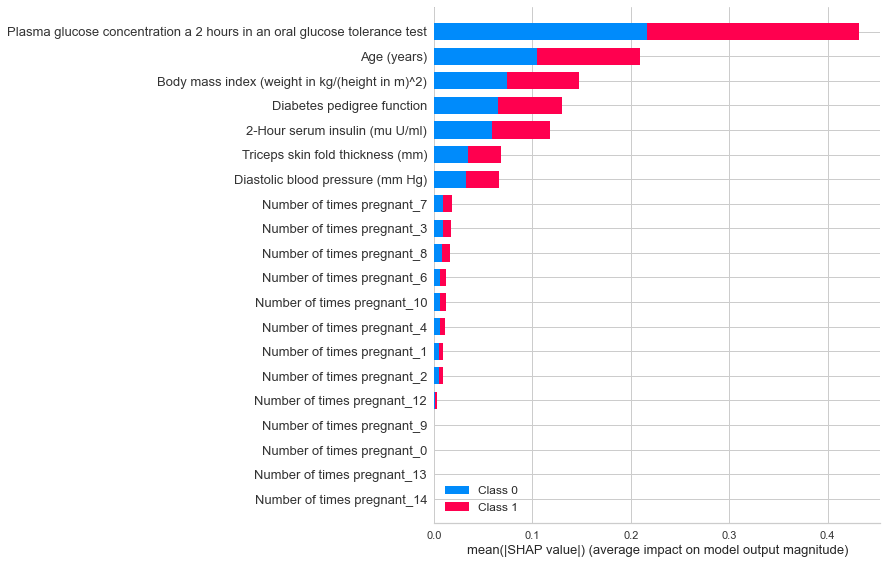

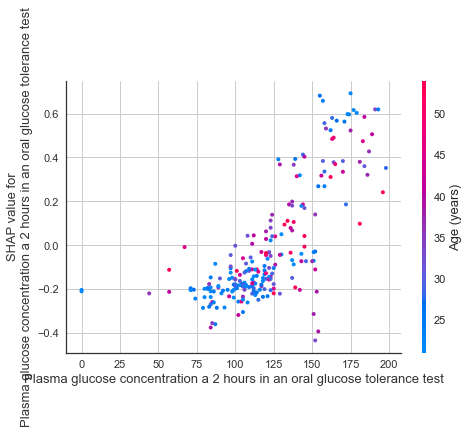

In [45]:
#!pip install shap
# create a model
#xgboost = create_model('xgboost')
#use dt, which showed the best performance previously

# summary plot
interpret_model(dt)

# correlation plot
interpret_model(dt, plot = 'correlation')

Interpretation of a particular datapoint (also known as reason argument) in the test dataset can be evaluated using ‘reason’ plot. In the below example we are checking the first instance in our test dataset.

In [51]:
interpret_model(dt, plot = 'reason', observation = 0) 

## Predict Model

So far the results we have seen are based on k-fold cross validation on training dataset only (70% by default). In order to see the predictions and performance of the model on the test / hold-out dataset, the predict_model function is used.

In [59]:
# create a model
#rf = create_model('rf')
#use dt_bagged, which showed the best performance previously

# predict test / hold-out dataset
rf_holdout_pred = predict_model(dt_bagged)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7316,0.7836,0.5190,0.6308,0.5694,0.3771,0.3809


predict_model function is also used to predict unseen dataset. 

In [60]:
predictions = predict_model(dt_bagged, data = diabetes)

## Deploy Model

deploy_model(model = rf, model_name = 'rf_aws', platform = 'aws', 
             authentication =  {'bucket'  : 'pycaret-test'})

## Save Model / Save Experiment

Once training is completed the entire pipeline containing all preprocessing transformations and trained model object can be saved as a binary pickle file.

In [62]:
# creating model
dt = create_model('dt')

# ensembling a trained dt model
dt_bagged = ensemble_model(dt)

# saving model
save_model(dt_bagged, model_name = 'dt_bagged_for_deployment')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.7158,0.4737,0.6429,0.5455,0.3520,0.3605
1,0.8704,0.8962,0.7368,0.8750,0.8000,0.7051,0.7108
2,0.7037,0.6955,0.4211,0.6154,0.5000,0.2998,0.3107
3,0.7963,0.8684,0.5789,0.7857,0.6667,0.5248,0.5375
4,0.8148,0.8301,0.6842,0.7647,0.7222,0.5840,0.5860
5,0.7778,0.8820,0.5263,0.7692,0.6250,0.4749,0.4921
6,0.7778,0.8068,0.5789,0.7333,0.6471,0.4882,0.4954
7,0.8113,0.8651,0.6667,0.7500,0.7059,0.5677,0.5698
8,0.7925,0.8653,0.5789,0.7857,0.6667,0.5210,0.5338
9,0.7925,0.8483,0.6316,0.7500,0.6857,0.5325,0.5369


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Class variable',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_split=None,
                                  

💡 You can load saved model and saved experiment using load_model and load_experiment function available in all modules of PyCaret.

In [66]:
#load_model('dt_bagged_for_deployment')